# Predicting Sales Of Summer With Machine Learning

This notebook will make prediction about product what sell wells and does not

## 1. Problem Definition

* How about trying to validate the established idea of human sensitiveness to price drops ? (discounted price compared to original retail_price)
* You may look for top categories of products so that you know what sells best
* Do bad products sell ? How about the relationship between the quality of a product (ratings) and its success ? Does the price factor into this ?


## 2. Data

The data is downloaded from The Kaggle Sales Of Summer: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish?select=summer-products-with-rating-and-performance_2020-08.csv.


## 3. Evaluation

Trying to get 90% accuracy to predicting wheter product sells wells and does not.


## 4. Features

The data containt some features and you can view it in Kaggle : https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish?select=summer-products-with-rating-and-performance_2020-08.csv


## Explatory Data Analyst And Plotting (EDA)

In this section, we are going to do EDA to know well about data

In [1]:
# Preparing for the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/sale-summer/summer-products-with-rating-and-performance_2020-08.csv")
df = data.copy()

In [3]:
df.head().T

,0,1,2,3,4
title,2020 Summer Vintage Flamingo Print Pajamas Se...,SSHOUSE Summer Casual Sleeveless Soirée Party ...,2020 Nouvelle Arrivée Femmes Printemps et Été ...,Hot Summer Cool T-shirt pour les femmes Mode T...,Femmes Shorts d'été à lacets taille élastique ...
title_orig,2020 Summer Vintage Flamingo Print Pajamas Se...,Women's Casual Summer Sleeveless Sexy Mini Dress,2020 New Arrival Women Spring and Summer Beach...,Hot Summer Cool T Shirt for Women Fashion Tops...,Women Summer Shorts Lace Up Elastic Waistband ...
price,16,8,8,8,2.72
retail_price,14,22,43,8,3
currency_buyer,EUR,EUR,EUR,EUR,EUR
units_sold,100,20000,100,5000,100
uses_ad_boosts,0,1,0,1,1
rating,3.76,3.45,3.57,4.03,3.1
rating_count,54,6135,14,579,20
rating_five_count,26,2269,5,295,6


In [4]:
# Let's check the info of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### Making some question

Before we do some exploration with data, we can make some question to help us to do exploration

1. What is a variable to know how product sell well or does not?
2. Are price and retail price connected? 
3. Is rating importand?
4. What is badge? What the purpose to have badge?
5. Is tag importand?
6. Are products have some variation? What the purpose of some variation in product?
7. Why has_urgency_banner and urgency_text have same length
8. Are origin_country guarantee product wheter is sell well or does not 
9. What is crawl_month?

## 1. What is a variable to know how product sell well or does not?

In [5]:
# Let's check unique catergory dataset
unique = pd.read_csv("./data/sale-summer/unique-categories.sorted-by-count.csv")
unique

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual
...,...,...
2615,1,2014menshort
2616,1,"2,piece dress sets"
2617,1,"2,Piece Swimsuit"
2618,1,#fashion #shorts


I dont see why we have to use unique dataset to know about product sell

Let's check unit_solds columns

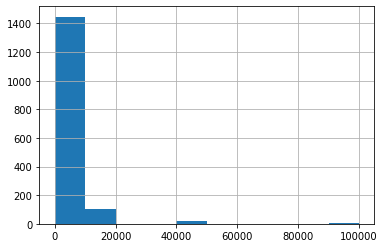

In [6]:
df.units_sold.hist();

In [7]:
df.units_sold.value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

Still dont see about product sell

In [8]:
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1528.0,1528.0,1528.0,1528.0,...,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,473.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,4.0,890.0,442.0,180.0,135.0,64.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26496.0,4.0,0.0
std,4.0,30.0,9357.0,0.0,1.0,1984.0,980.0,401.0,312.0,151.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,24.0,12.0,5.0,4.0,2.0,...,0.0,6.0,2.0,0.0,31.0,50.0,1.0,1987.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,79.0,32.0,24.0,11.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,7936.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,414.0,168.0,129.0,62.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


Hmm, Can we use 50% to know about how product sell?

In [9]:
# If units_sold < 50% value, 
# then product doesnt sell well (We use 0 to flag if product doesnt sell well and 1 if product sell well)

def product_sell(unit_solds):
    if(unit_solds<1000):
        return 0
    
    return 1

df["is_product_sell_well"] = df["units_sold"].apply(product_sell)

In [10]:
pd.crosstab(df["units_sold"], df["is_product_sell_well"])

is_product_sell_well,0,1
units_sold,,
1,3,0
2,2,0
3,2,0
6,1,0
7,2,0
8,4,0
10,49,0
50,76,0
100,509,0


Let's try to make visualization

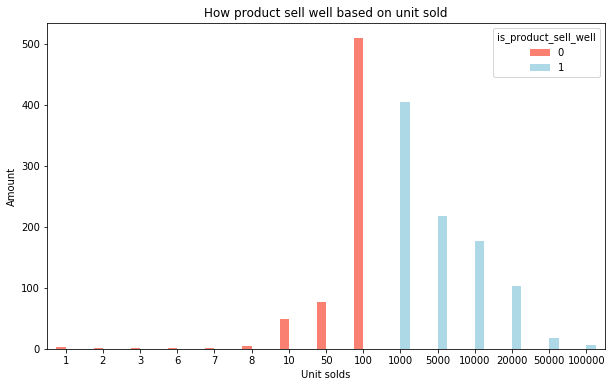

In [11]:
pd.crosstab(df["units_sold"], df["is_product_sell_well"]).plot(kind="bar",
                                                               figsize=(10,6),
                                                               color=["salmon", "lightblue"]);

plt.title("How product sell well based on unit sold")
plt.xlabel("Unit solds")
plt.ylabel("Amount")
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [12]:
# Check amount of is_product_sell_sell
df.is_product_sell_well.value_counts()

1    925
0    648
Name: is_product_sell_well, dtype: int64

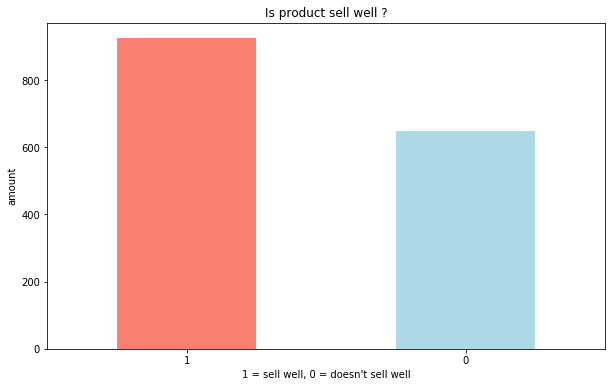

In [13]:
df.is_product_sell_well.value_counts().plot(kind="bar",
                                          figsize=(10,6),
                                          color=["salmon", "lightblue"]);
plt.title("Is product sell well ?")
plt.xlabel("1 = sell well, 0 = doesn't sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

product who have sell wells is higher than doesn't sell well. Lets continue to next question


### 2. Are price and retail price connected?

In [14]:
df[["price", "retail_price"]].head(10)

,price,retail_price
0,16.00,14
1,8.00,22
2,8.00,43
3,8.00,8
4,2.72,3
5,3.92,9
6,7.00,6
7,12.00,11
8,11.00,84
9,5.78,22


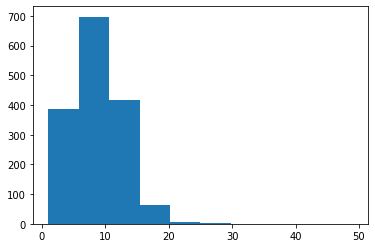

In [15]:
plt.hist(df["price"]); 

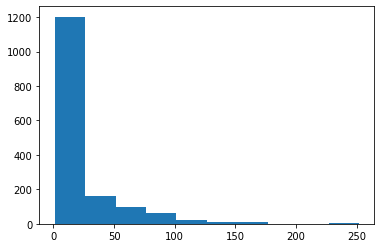

In [16]:
plt.hist(df["retail_price"]);

Hmm, still don't get the connection, maybe we need to check feature explanation in kaggle.

`retail_price` = reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or the price before discount.

`price` =  price you would pay to get the product

Okay, so maybe, what if price lower or higher than retail price? are there a pattern to predict sell product.

Let's try compare `price` with `retail_price`

In [17]:
def compare_price(retail_price, price):
    """
    Compare retail price and price
    
    0: price is same with retail_price
    1: price is lower than retail_price
    2: price is higher than retail_price 
    """
    is_cheaper_price = []
    
    for i in range(0, len(retail_price)):
        if (price[i] == retail_price[i]):
            is_cheaper_price.append(0)
        
        if (price[i] > retail_price[i]):
            is_cheaper_price.append(1)
        
        if (price[i] < retail_price[i]):
            is_cheaper_price.append(2)
            

            
    return is_cheaper_price

    
lower_price = compare_price(df.retail_price, df.price)
df["compare_price"] = lower_price

In [18]:
df[["price", "retail_price", "compare_price" ]]

,price,retail_price,compare_price
0,16.00,14,1
1,8.00,22,2
2,8.00,43,2
3,8.00,8,0
4,2.72,3,2
...,...,...,...
1568,6.00,9,2
1569,2.00,56,2
1570,5.00,19,2
1571,13.00,11,1


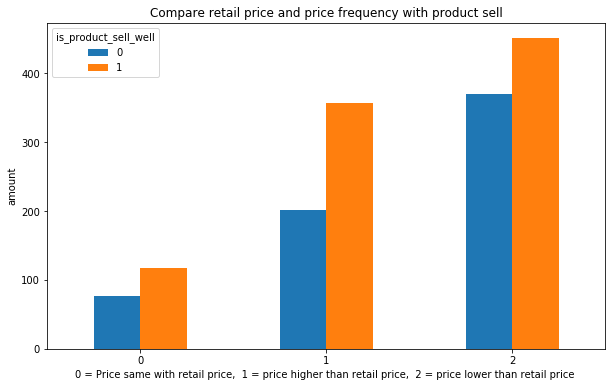

In [19]:
pd.crosstab(df["compare_price"],df["is_product_sell_well"]).plot(kind="bar",
                                                                 figsize=(10,6));

plt.title("Compare retail price and price frequency with product sell")
plt.xlabel("0 = Price same with retail price,  1 = price higher than retail price,  2 = price lower than retail price ")
plt.ylabel("amount")
plt.xticks(rotation = 0);

It's seem price lower than retail price have a good product sells

Let's continue to next question

### 3. Is rating importan?

In [20]:
df[["rating", "rating_count", "rating_five_count", "rating_four_count", "rating_three_count", "rating_two_count", "rating_one_count"]]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,3.76,54,26.0,8.0,10.0,1.0,9.0
1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0
2,3.57,14,5.0,4.0,2.0,0.0,3.0
3,4.03,579,295.0,119.0,87.0,42.0,36.0
4,3.10,20,6.0,4.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...
1568,4.08,1367,722.0,293.0,185.0,77.0,90.0
1569,3.07,28,11.0,3.0,1.0,3.0,10.0
1570,3.71,59,24.0,15.0,8.0,3.0,9.0
1571,2.50,2,0.0,1.0,0.0,0.0,1.0


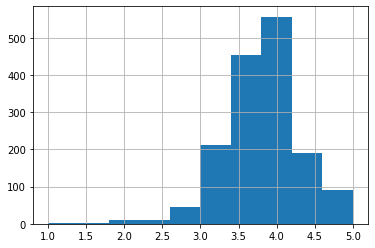

In [21]:
df.rating.hist();

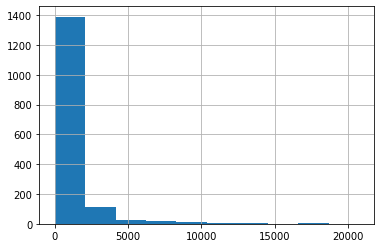

In [22]:
df.rating_count.hist();

In [23]:
df.rating.value_counts, df.rating_count.value_counts

(<bound method IndexOpsMixin.value_counts of 0       3.76
 1       3.45
 2       3.57
 3       4.03
 4       3.10
         ... 
 1568    4.08
 1569    3.07
 1570    3.71
 1571    2.50
 1572    4.07
 Name: rating, Length: 1573, dtype: float64>,
 <bound method IndexOpsMixin.value_counts of 0         54
 1       6135
 2         14
 3        579
 4         20
         ... 
 1568    1367
 1569      28
 1570      59
 1571       2
 1572      14
 Name: rating_count, Length: 1573, dtype: int64>)

Still don't see why rating is importan, maybe we need correlation analysis but we dont do that in this question section. 

Let's check if rating have null values or not. If have null values, we will do something to null values

In [24]:
df[["rating", "rating_count", 
    "rating_five_count", 
    "rating_four_count", 
    "rating_three_count", 
    "rating_two_count", 
    "rating_one_count"]].isnull().sum()

rating                 0
rating_count           0
rating_five_count     45
rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64

Change null values to 0

In [25]:
df.rating_five_count.fillna(0, inplace=True)
df.rating_four_count.fillna(0, inplace=True)
df.rating_three_count.fillna(0, inplace=True)
df.rating_two_count.fillna(0, inplace=True)
df.rating_one_count.fillna(0, inplace=True)

In [26]:
df[["rating", "rating_count", 
    "rating_five_count", 
    "rating_four_count", 
    "rating_three_count", 
    "rating_two_count", 
    "rating_one_count"]].isnull().sum()

rating                0
rating_count          0
rating_five_count     0
rating_four_count     0
rating_three_count    0
rating_two_count      0
rating_one_count      0
dtype: int64

## 4. What is badge? What the purpose to have badge?

In [27]:
df[["badges_count","badge_local_product", "badge_product_quality", "badge_fast_shipping"]]

,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1568,0,0,0,0
1569,0,0,0,0
1570,0,0,0,0
1571,0,0,0,0


In [28]:
df[["badges_count","badge_local_product", "badge_product_quality", "badge_fast_shipping"]].isna().sum()

badges_count             0
badge_local_product      0
badge_product_quality    0
badge_fast_shipping      0
dtype: int64

Let's check the features dictionary in kaggle

`badges_count` = Number of badges the product or the seller have

`badge_local_product` = A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge

`badge_product_quality` = Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge

`badge_fast_shipping` = Badge awarded when this product's order is consistently shipped rapidly

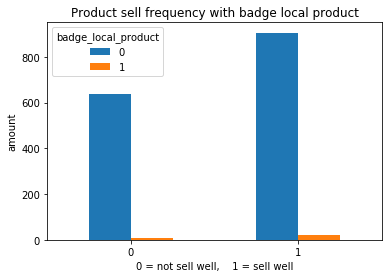

In [29]:
pd.crosstab(df.is_product_sell_well, df.badge_local_product).plot(kind="bar");

plt.title("Product sell frequency with badge local product")
plt.xlabel("0 = not sell well,    1 = sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

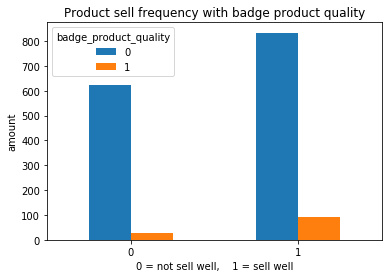

In [30]:
pd.crosstab(df.is_product_sell_well, df.badge_product_quality).plot(kind="bar");

plt.title("Product sell frequency with badge product quality")
plt.xlabel("0 = not sell well,    1 = sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

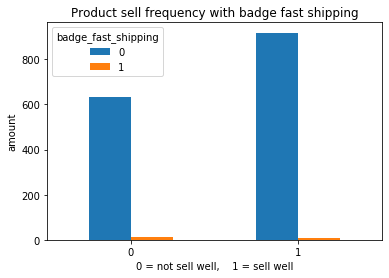

In [31]:
pd.crosstab(df.is_product_sell_well, df.badge_fast_shipping).plot(kind="bar");

plt.title("Product sell frequency with badge fast shipping")
plt.xlabel("0 = not sell well,    1 = sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

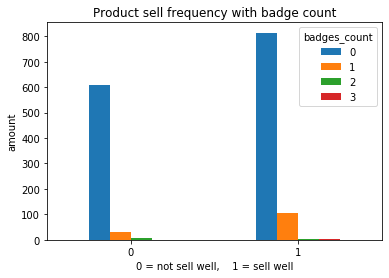

In [32]:
pd.crosstab(df.is_product_sell_well, df.badges_count).plot(kind="bar");

plt.title("Product sell frequency with badge count")
plt.xlabel("0 = not sell well,    1 = sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

From what we see, badge doesn't have much effect to product sell

Let's go to next question

## 5. Is tag importand?

In [33]:
df.tags

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

We have csv file to know unique values in tags

In [34]:
tags = pd.read_csv("./data/sale-summer/unique-categories.sorted-by-count.csv")
tags.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


Okay, maybe it's importand but i dont know how to process them to connect with our summer sale dataset

Let's go to next question

## 6. Are products have some variation? What the purpose of some variation in product?

In [35]:
# Check null values before see variation of product

df[["product_color", "product_variation_size_id", "product_variation_inventory"]].isnull().sum()

product_color                  41
product_variation_size_id      14
product_variation_inventory     0
dtype: int64

In [36]:
df.product_color.fillna("missing", inplace=True)
df.product_variation_size_id.fillna("missing", inplace=True)

In [37]:
df[["product_color", "product_variation_size_id", "product_variation_inventory"]].isnull().sum()

product_color                  0
product_variation_size_id      0
product_variation_inventory    0
dtype: int64

In [38]:
df[["product_color", "product_variation_size_id", "product_variation_inventory"]].head(10)

,product_color,product_variation_size_id,product_variation_inventory
0,white,M,50
1,green,XS,50
2,leopardprint,XS,1
3,black,M,50
4,yellow,S,1
5,navyblue,Size-XS,1
6,white,XS,50
7,blue,M.,50
8,black,M,50
9,beige,S,50


Product have some variation but several value have same meaning. We can group value who have same meaning with just 1 value

This is what we have to do
1. Check unique values
2. Change the name of value who have same meaning with just 1 value

In [39]:
df["product_variation_size_id"].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'missing',
       'S.', 's', 'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL',
       'EU 35', '4', 'Size S.', '1m by 3m', '3XL', 'Size S', 'XL',
       'Women Size 36', 'US 6.5 (EU 37)', 'XXXS', 'SIZE XS',
       '26(Waist 72cm 28inch)', 'Size XXS', '29', '1pc', '100 cm',
       'One Size', 'SIZE-4XL', '1', 'S/M(child)', '2pcs', 'XXXL', 'S..',
       '30 cm', '5XL', '33', 'Size M', '100 x 100cm(39.3 x 39.3inch)',
       '100pcs', '2XL', '4XL', 'SizeL', 'SIZE XXS', 'XXXXL',
       'Base & Top & Matte Top Coat', 'size S', '35', '34', 'SIZE-XXS',
       'S(bust 88cm)', 'S (waist58-62cm)', 'S(Pink & Black)', '20pcs',
       'US-S', 'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Si

Let's group some value into just 1 value

In [40]:
size_xs_and_up = ['XS', 'Size-XS', 'XXS', 'XXXS', 'SIZE XS', 'Size XXS', 'SIZE-XXS', 'Size -XXS',
                  'Size-XXS','SIZE XXS', 'XS.',  ]

size_s = ['S', 's', 'S.', 'Suit-S', 'Size S.', 'Size S', 'S/M(child)', 'size S',
          'S(bust 88cm)', 'S (waist58-62cm)', 'S(Pink & Black)', 'US-S', 'Size-S', 
          'S Diameter 30cm', '25-S', 'Size/S', 'S Pink', 'pants-S', 'Size--S', 'SIZE S',
          'S..']

size_m = ['M', 'M.', 'Size M', 'daughter 24M']

size_l = ['L', 'SizeL', '32/L', 'L.', 'Size-L']

size_xl_and_up = ['XXL', 'XXXXXL', '3XL', 'XL', 'XXXL', '5XL', '2XL', '4XL', 'XXXXL',
                  'X   L', 'Size-5XL', 'Size4XL', '04-3XL', '1 PC - XL', 'SIZE-4XL', '6XL'  ]

def one_size (df, group_size, size):
    for i in range(len(df)):
        for j in range(len(group_size)):
            if(df[i]==group_size[j]):
                df[i] = size
    return df.unique()

            


In [41]:
one_size(df["product_variation_size_id"], size_xs_and_up, 'XS++')
one_size(df["product_variation_size_id"], size_s, 'S')
one_size(df["product_variation_size_id"], size_l, 'L')
one_size(df["product_variation_size_id"], size_m, 'M')
one_size(df["product_variation_size_id"], size_xl_and_up, 'XL++')

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array(['M', 'XS++', 'S', 'L', 'XL++', 'missing', 'choose a size', 'EU 35',
       '4', '1m by 3m', 'Women Size 36', 'US 6.5 (EU 37)',
       '26(Waist 72cm 28inch)', '29', '1pc', '100 cm', 'One Size', '1',
       '2pcs', '30 cm', '33', '100 x 100cm(39.3 x 39.3inch)', '100pcs',
       'Base & Top & Matte Top Coat', '35', '34', '20pcs', 'White', '25',
       'Round', 'Pack of 1', '1 pc.', 'AU plug Low quality', '5PAIRS',
       '2', 'Baby Float Boat', '10 ml', '60', 'US5.5-EU35', '10pcs', '17',
       'Women Size 37', '3 layered anklet', '4-5 Years',
       'first  generation', '80 X 200 CM', 'EU39(US8)', 'Base Coat', '36',
       'Floating Chair for Kid', '20PCS-10PAIRS', 'B', '5', 'H01',
       '40 cm'], dtype=object)

There are still some value who have a strange name, we can change that value name to `other`

In [42]:
size_other = ['missing', 'choose a size', 'EU 35',
       '4', '1m by 3m', 'Women Size 36', 'US 6.5 (EU 37)',
       '26(Waist 72cm 28inch)', '29', '1pc', '100 cm', 'One Size', '1',
       '2pcs', '30 cm', '33', '100 x 100cm(39.3 x 39.3inch)', '100pcs',
       'Base & Top & Matte Top Coat', '35', '34', '20pcs', 'White', '25',
       'Round', 'Pack of 1', '1 pc.', 'AU plug Low quality', '5PAIRS',
       '2', 'Baby Float Boat', '10 ml', '60', 'US5.5-EU35', '10pcs', '17',
       'Women Size 37', '3 layered anklet', '4-5 Years',
       'first  generation', '80 X 200 CM', 'EU39(US8)', 'Base Coat', '36',
       'Floating Chair for Kid', '20PCS-10PAIRS', 'B', '5', 'H01',
       '40 cm']

one_size(df["product_variation_size_id"], size_other, 'other')

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array(['M', 'XS++', 'S', 'L', 'XL++', 'other'], dtype=object)

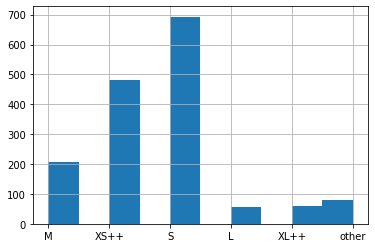

In [43]:
df["product_variation_size_id"].hist();

We can make some color into 1 group value too (product_color), but i don't do that, because i want to go to next question

## 7. Why has_urgency_banner and urgency_text have same length

In [44]:
df[["has_urgency_banner", "urgency_text"]].isnull().sum()

has_urgency_banner    1100
urgency_text          1100
dtype: int64

In [45]:
df[["has_urgency_banner", "urgency_text"]].head(10)

,has_urgency_banner,urgency_text
0,1.0,Quantité limitée !
1,1.0,Quantité limitée !
2,1.0,Quantité limitée !
3,NaN,NaN
4,1.0,Quantité limitée !
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,1.0,Quantité limitée !
9,NaN,NaN


I think, if `has_urgency_banner` have a value, so `urgency_text` have value too

In [46]:
df.has_urgency_banner.unique()

array([ 1., nan])

In [47]:
df.urgency_text.unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [48]:
df["has_urgency_banner"].fillna(0, inplace=True)
df["urgency_text"].fillna("Doesn't have urgency banner", inplace=True)

In [49]:
df[["has_urgency_banner", "urgency_text"]].head(10)

,has_urgency_banner,urgency_text
0,1.0,Quantité limitée !
1,1.0,Quantité limitée !
2,1.0,Quantité limitée !
3,0.0,Doesn't have urgency banner
4,1.0,Quantité limitée !
5,0.0,Doesn't have urgency banner
6,0.0,Doesn't have urgency banner
7,0.0,Doesn't have urgency banner
8,1.0,Quantité limitée !
9,0.0,Doesn't have urgency banner


## 8. Are origin_country guarantee product wheter is sell well or does not

In [50]:
df.origin_country.value_counts()

CN    1516
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

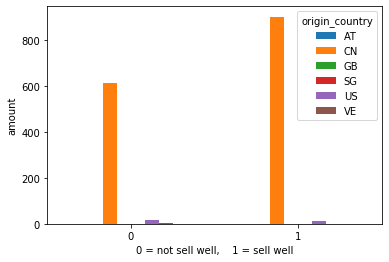

In [51]:
pd.crosstab(df["is_product_sell_well"], df["origin_country"]).plot(kind="bar");

plt.xlabel("Product sell by origin country")
plt.xlabel("0 = not sell well,    1 = sell well")
plt.ylabel("amount")
plt.xticks(rotation=0);

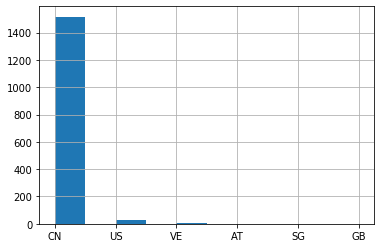

In [52]:
df["origin_country"].hist();

As we see, mostly product origin country is from cn, we can consider outside CN is outlier and we will change other country to `other`

In [53]:
df["origin_country"][df["origin_country"]!="CN"] = 'other'

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


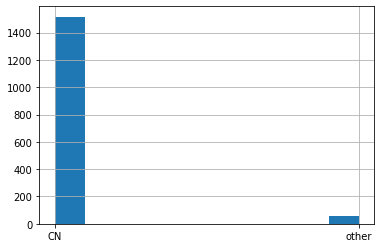

In [54]:
df["origin_country"].hist()

## 9. What is crawl_month?

In [55]:
df.crawl_month.value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In this data, the time is same, so we can't make this into time series 

**After answer some question, next step is**

1. Check if we still have some null values
2. Turn string values into number
3. Make a machine learning model
4. Evaluation the model
5. Turning model
6. Check Feature Importand/Correlation analysis
7. Try improve a model 

## Check Null Values

In [56]:
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [57]:
# Let's check the null values
df[["merchant_title", "merchant_name", "merchant_info_subtitle"]][df["merchant_info_subtitle"].isna()]

,merchant_title,merchant_name,merchant_info_subtitle
438,tutishop,tutishop,NaN


In [58]:
# Let's just drop them
df.dropna(subset=['merchant_info_subtitle'],inplace=True)

In [59]:
# Check merchan name who have null value
df[["merchant_title"]][df["merchant_name"].isnull()]

,merchant_title
408,DERNMUUR
505,DERNMUUR
1103,DERNMUUR
1350,DERNMUUR


In [60]:
df[["merchant_title", "merchant_name"]].head()

,merchant_title,merchant_name
0,zgrdejia,zgrdejia
1,SaraHouse,sarahouse
2,hxt520,hxt520
3,allenfan,allenfan
4,youngpeopleshop,happyhorses


Because some of value in `merchant_title` and `merchant_name` is same, so we can change  `merchant name` who have null values with value in `merchant_title`

In [61]:
df["merchant_name"].fillna("DERNMUUR", inplace=True)

In [62]:
df.merchant_profile_picture.unique()

array([nan,
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_580f06685250a20783d33e56.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg'

Hmm, i think we can drop the merchan_profile_picture because the value is just link of picture

In [63]:
df.drop("merchant_profile_picture", axis=1, inplace=True)

In [64]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month,is_product_sell_well,compare_price
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,0,1
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1,2
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,0,2
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,1,0
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,0,2


## Turn string values into number

Because model can't accept string values, so we need change string values into number values

In [65]:
# Check columns which *aren't* numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

title
title_orig
currency_buyer
tags
product_color
product_variation_size_id
shipping_option_name
urgency_text
origin_country
merchant_title
merchant_name
merchant_info_subtitle
merchant_id
product_url
product_picture
product_id
theme
crawl_month


In [66]:
# Turn them into categorical
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   title                         1572 non-null   category
 1   title_orig                    1572 non-null   category
 2   price                         1572 non-null   float64 
 3   retail_price                  1572 non-null   int64   
 4   currency_buyer                1572 non-null   category
 5   units_sold                    1572 non-null   int64   
 6   uses_ad_boosts                1572 non-null   int64   
 7   rating                        1572 non-null   float64 
 8   rating_count                  1572 non-null   int64   
 9   rating_five_count             1572 non-null   float64 
 10  rating_four_count             1572 non-null   float64 
 11  rating_three_count            1572 non-null   float64 
 12  rating_two_count              1572 non-null   fl

In [68]:
# Turn categorical values into number 
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

In [69]:
df.head().T

,0,1,2,3,4
title,155.000000,936.000000,141.000000,535.000000,399.000000
title_orig,164.000000,1042.000000,135.000000,336.000000,1013.000000
price,16.000000,8.000000,8.000000,8.000000,2.720000
retail_price,14.000000,22.000000,43.000000,8.000000,3.000000
currency_buyer,1.000000,1.000000,1.000000,1.000000,1.000000
units_sold,100.000000,20000.000000,100.000000,5000.000000,100.000000
uses_ad_boosts,0.000000,1.000000,0.000000,1.000000,1.000000
rating,3.760000,3.450000,3.570000,4.030000,3.100000
rating_count,54.000000,6135.000000,14.000000,579.000000,20.000000
rating_five_count,26.000000,2269.000000,5.000000,295.000000,6.000000


In [70]:
# Now our data is completely numeric. Let's turn them into train and test split
from sklearn.model_selection import train_test_split

X = df.drop("is_product_sell_well", axis=1)
y = df["is_product_sell_well"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

## Make a machine learning model

We can find a pattern from our data with machine learning model. We can use some machine learning model

Machine learning model we will use :
1. RandomForestClassifier()
2. KNeighboursClassifier()
3. LogisticRegression()

In [71]:
# First import our machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Put model into dictionary
model = {"RandomForesClassifier" : RandomForestClassifier(),
         "KNeighborsClassfier": KNeighborsClassifier(),
         "LogisticRegression": LogisticRegression(max_iter=10000)}

# Create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible result
    np.random.seed(42)
    # Make a list to keep model scores
    model_score = {}
    # Loop through a model 
    for name, model in model.items():
        # Fit model to the data
        model.fit(X_train, y_train)
        # Test the data in model
        model_score[name] =  model.score(X_test, y_test)
    
    return model_score

In [72]:
model_scores =fit_and_score(model = model,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

{'RandomForesClassifier': 1.0,
 'KNeighborsClassfier': 0.9301587301587302,
 'LogisticRegression': 1.0}

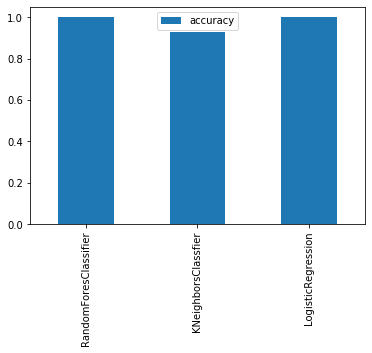

In [73]:
## Model comparison

model_comparison = pd.DataFrame(model_scores, index=["accuracy"])

model_comparison.T.plot(kind="bar")

Well it's too good for baseline model, maybe it because factor of luck or something like that. We will use crossvalidation to check the true score

## Evaluation the model

In [74]:
# import classification report and cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

scoring = {"Accuracy":"accuracy",
           "Precision":"precision",
           "Recal": "recall",
           "F1": "f1"}

def evaluation_model(model, scoring, X_train, X_test, y_train, y_test): 
    model_score = {}
    mean_score = {}
    cv_scoring = {}
    cv_scoring_mean = {}
    
    # Loop through a model 
    for name_score, scoring in scoring.items():
        for name, model_value in model.items():
            model_score[name] = cross_val_score(model_value,
                                                X,
                                                y,
                                                cv=5, # 5-fold cross-validation
                                                scoring=scoring) # accuracy as scoring
            mean_score[name] = np.mean(model_score[name])
        cv_scoring[name_score] = model_score
        cv_scoring_mean[name_score] = mean_score
        
        cv = [cv_scoring, cv_scoring_mean]
    
    return cv

In [75]:
evaluation = evaluation_model(model=model,
                             scoring=scoring,
                             X_train = X_train,
                                        X_test = X_test,
                                        y_train = y_train,
                                        y_test = y_test)

evaluation[0]

{'Accuracy': {'RandomForesClassifier': array([0.99728997, 1.        , 1.        , 1.        , 1.        ]),
  'KNeighborsClassfier': array([0.96083551, 0.98369565, 0.96132597, 0.96195652, 0.95392954]),
  'LogisticRegression': array([1., 1., 1., 1., 1.])},
 'Precision': {'RandomForesClassifier': array([0.99728997, 1.        , 1.        , 1.        , 1.        ]),
  'KNeighborsClassfier': array([0.96083551, 0.98369565, 0.96132597, 0.96195652, 0.95392954]),
  'LogisticRegression': array([1., 1., 1., 1., 1.])},
 'Recal': {'RandomForesClassifier': array([0.99728997, 1.        , 1.        , 1.        , 1.        ]),
  'KNeighborsClassfier': array([0.96083551, 0.98369565, 0.96132597, 0.96195652, 0.95392954]),
  'LogisticRegression': array([1., 1., 1., 1., 1.])},
 'F1': {'RandomForesClassifier': array([0.99728997, 1.        , 1.        , 1.        , 1.        ]),
  'KNeighborsClassfier': array([0.96083551, 0.98369565, 0.96132597, 0.96195652, 0.95392954]),
  'LogisticRegression': array([1., 1.,

In [76]:
evaluation[1]

{'Accuracy': {'RandomForesClassifier': 0.9994579945799458,
  'KNeighborsClassfier': 0.9643486378395293,
  'LogisticRegression': 1.0},
 'Precision': {'RandomForesClassifier': 0.9994579945799458,
  'KNeighborsClassfier': 0.9643486378395293,
  'LogisticRegression': 1.0},
 'Recal': {'RandomForesClassifier': 0.9994579945799458,
  'KNeighborsClassfier': 0.9643486378395293,
  'LogisticRegression': 1.0},
 'F1': {'RandomForesClassifier': 0.9994579945799458,
  'KNeighborsClassfier': 0.9643486378395293,
  'LogisticRegression': 1.0}}

In [77]:
model_frame = pd.DataFrame(evaluation[1])

model_frame

,Accuracy,Precision,Recal,F1
RandomForesClassifier,0.999458,0.999458,0.999458,0.999458
KNeighborsClassfier,0.964349,0.964349,0.964349,0.964349
LogisticRegression,1.000000,1.000000,1.000000,1.000000


## Check Feature Importance/Correlation analysis

We do check feature importance to know how much each feature contribute to how a model makes a decision on whether patterns in a sample of product sell leans more towards having sell wells or not.

In [78]:
# RandomForest cant do coefiecient, so we just use LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.coef_[0]

array([-2.02599982e-03, -1.72862164e-03, -1.32812126e-03, -2.92979674e-03,
       -8.97998480e-05,  4.71253416e-02,  3.84934815e-06, -3.25278687e-04,
        5.67378848e-05, -2.18711382e-05, -2.47109518e-07,  1.69560460e-04,
        2.89855642e-05, -1.19689891e-04, -3.70946821e-05, -1.83635937e-05,
       -2.48940990e-07, -1.84821474e-05,  2.40886088e-04, -3.28589354e-03,
       -2.04709647e-04, -5.34845030e-03, -5.25151302e-04, -4.17123882e-04,
       -1.83620784e-05, -4.56977994e-03, -4.34348208e-03, -4.68128760e-06,
       -9.44811787e-05, -9.30383647e-05, -7.09840256e-04, -7.02131094e-03,
       -7.42701910e-03, -6.10281390e-05, -3.83937961e-04, -1.24223244e-02,
       -2.77792633e-06, -3.21839608e-03, -3.21839608e-03, -3.21839608e-03,
       -8.97998480e-05, -8.97998480e-05, -1.12865930e-04])

In [79]:
# Match feature to column
features_dict = dict(zip(df.columns, list(model.coef_[0])))
features_dict

{'title': -0.002025999821172053,
 'title_orig': -0.0017286216404802184,
 'price': -0.0013281212551072953,
 'retail_price': -0.0029297967360565726,
 'currency_buyer': -8.979984795182784e-05,
 'units_sold': 0.04712534156338728,
 'uses_ad_boosts': 3.849348145447191e-06,
 'rating': -0.0003252786867712198,
 'rating_count': 5.6737884762526964e-05,
 'rating_five_count': -2.1871138150323054e-05,
 'rating_four_count': -2.471095184050875e-07,
 'rating_three_count': 0.00016956045954720416,
 'rating_two_count': 2.8985564189706243e-05,
 'rating_one_count': -0.00011968989130490289,
 'badges_count': -3.709468209692903e-05,
 'badge_local_product': -1.836359370509019e-05,
 'badge_product_quality': -2.489409896743012e-07,
 'badge_fast_shipping': -1.84821474021635e-05,
 'tags': 0.00024088608803165106,
 'product_color': -0.003285893544327091,
 'product_variation_size_id': -0.00020470964738035274,
 'product_variation_inventory': -0.005348450303583653,
 'shipping_option_name': -0.0005251513021817922,
 'ship

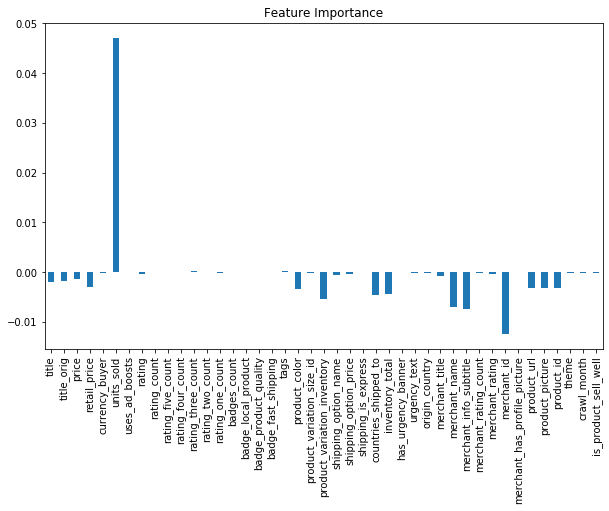

In [80]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(10,6));

units_sold have a higher importance feature but remember we use that column for analyze whait is product sell well and doesnt. Because of that, let's try to delete it and let's check a score and feature importance again

In [81]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month,is_product_sell_well,compare_price
0,155,164,16.00,14,1,100,0,3.76,54,26.0,...,4.128521,534,0,1052,1052,1052,1,1,0,1
1,936,1042,8.00,22,1,20000,1,3.45,6135,2269.0,...,3.899673,144,0,63,63,63,1,1,1,2
2,141,135,8.00,43,1,100,0,3.57,14,5.0,...,3.989831,809,0,1087,1087,1087,1,1,0,2
3,535,336,8.00,8,1,5000,1,4.03,579,295.0,...,4.020435,466,0,548,548,548,1,1,1,0
4,399,1013,2.72,3,1,100,1,3.10,20,6.0,...,4.001588,641,0,1222,1222,1222,1,1,0,2


In [82]:
model = {"RandomForesClassifier" : RandomForestClassifier(),
         "KNeighborsClassfier": KNeighborsClassifier(),
         "LogisticRegression": LogisticRegression(max_iter=1000)}

X = df.drop(["units_sold","is_product_sell_well"], axis=1)
y = df["is_product_sell_well"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [83]:
evaluation = evaluation_model(model=model,
                             scoring=scoring,
                             X_train = X_train,
                                X_test = X_test,
                                y_train = y_train,
                                y_test = y_test)

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

I know it's much warning show, but i wont fix it now

If you want interest how to fix them, you can check it here :
https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Let's check the score

In [84]:
evaluation[0]

{'Accuracy': {'RandomForesClassifier': array([0.96952909, 0.97222222, 0.97574124, 0.95392954, 0.95054945]),
  'KNeighborsClassfier': array([0.83923706, 0.86501377, 0.82191781, 0.81940701, 0.79886686]),
  'LogisticRegression': array([0.96418733, 0.96111111, 0.96236559, 0.95675676, 0.94246575])},
 'Precision': {'RandomForesClassifier': array([0.96952909, 0.97222222, 0.97574124, 0.95392954, 0.95054945]),
  'KNeighborsClassfier': array([0.83923706, 0.86501377, 0.82191781, 0.81940701, 0.79886686]),
  'LogisticRegression': array([0.96418733, 0.96111111, 0.96236559, 0.95675676, 0.94246575])},
 'Recal': {'RandomForesClassifier': array([0.96952909, 0.97222222, 0.97574124, 0.95392954, 0.95054945]),
  'KNeighborsClassfier': array([0.83923706, 0.86501377, 0.82191781, 0.81940701, 0.79886686]),
  'LogisticRegression': array([0.96418733, 0.96111111, 0.96236559, 0.95675676, 0.94246575])},
 'F1': {'RandomForesClassifier': array([0.96952909, 0.97222222, 0.97574124, 0.95392954, 0.95054945]),
  'KNeighbor

In [85]:
evaluation[1]

{'Accuracy': {'RandomForesClassifier': 0.9643943075663651,
  'KNeighborsClassfier': 0.8288885006309805,
  'LogisticRegression': 0.9573773081028133},
 'Precision': {'RandomForesClassifier': 0.9643943075663651,
  'KNeighborsClassfier': 0.8288885006309805,
  'LogisticRegression': 0.9573773081028133},
 'Recal': {'RandomForesClassifier': 0.9643943075663651,
  'KNeighborsClassfier': 0.8288885006309805,
  'LogisticRegression': 0.9573773081028133},
 'F1': {'RandomForesClassifier': 0.9643943075663651,
  'KNeighborsClassfier': 0.8288885006309805,
  'LogisticRegression': 0.9573773081028133}}

In [86]:
model_frame = pd.DataFrame(evaluation[1])

model_frame

,Accuracy,Precision,Recal,F1
RandomForesClassifier,0.964394,0.964394,0.964394,0.964394
KNeighborsClassfier,0.828889,0.828889,0.828889,0.828889
LogisticRegression,0.957377,0.957377,0.957377,0.957377


In [87]:
# RandomForest cant do coefiecient, so we just use LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/ihsanul/Documents/heart-disease-project/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9428571428571428

In [88]:
model.coef_[0]

array([ 1.83074365e-04,  1.49209784e-03, -1.16400527e-01, -1.39333469e-02,
       -4.59227909e-03,  4.50442666e-03, -1.68307483e-02,  6.45344759e-02,
        3.03092629e-02, -8.68860148e-02,  5.58054789e-02,  2.88061734e-02,
        3.64995754e-02, -8.96034776e-04, -2.30422523e-04, -2.01581738e-04,
       -4.64030515e-04, -9.32262709e-04, -7.17568511e-04, -2.49301039e-02,
        2.24939634e-02, -2.60157144e-02, -3.02856887e-02, -5.60126782e-05,
        2.01950688e-02, -1.87885868e-01, -3.10529734e-03, -7.69756972e-03,
       -9.11753778e-03, -4.84206048e-04, -1.64046299e-03, -1.56858591e-03,
        6.76290914e-06, -1.93089160e-02, -7.33218890e-04,  1.66611580e-03,
        1.78452873e-03,  1.78452873e-03,  1.78452873e-03, -4.59227909e-03,
       -4.59227909e-03,  4.76872035e-03])

In [89]:
# Match feature to column
features_dict = dict(zip(df.columns, list(model.coef_[0])))
features_dict

{'title': 0.00018307436519549104,
 'title_orig': 0.001492097838272057,
 'price': -0.11640052698146455,
 'retail_price': -0.013933346857864768,
 'currency_buyer': -0.0045922790924619135,
 'units_sold': 0.004504426658566409,
 'uses_ad_boosts': -0.016830748284064705,
 'rating': 0.06453447588192374,
 'rating_count': 0.03030926294869631,
 'rating_five_count': -0.08688601479322068,
 'rating_four_count': 0.0558054788812633,
 'rating_three_count': 0.02880617340165419,
 'rating_two_count': 0.03649957544331971,
 'rating_one_count': -0.0008960347758066023,
 'badges_count': -0.0002304225227286265,
 'badge_local_product': -0.00020158173828169532,
 'badge_product_quality': -0.00046403051479669446,
 'badge_fast_shipping': -0.0009322627087274725,
 'tags': -0.0007175685108698592,
 'product_color': -0.0249301039254911,
 'product_variation_size_id': 0.022493963448115863,
 'product_variation_inventory': -0.026015714351065256,
 'shipping_option_name': -0.030285688699672467,
 'shipping_option_price': -5.601

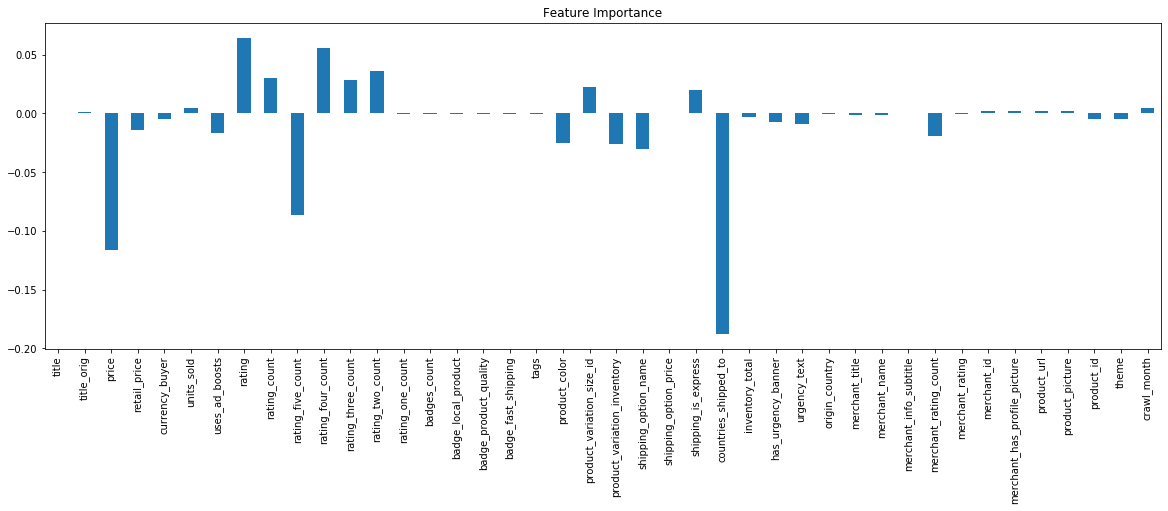

In [90]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20,6));

So we can see there are several column who change height of feature imortance. 

Let's delete column who have low height and see the difference

In [91]:
df.head(2).T

,0,1
title,155.000000,936.000000
title_orig,164.000000,1042.000000
price,16.000000,8.000000
retail_price,14.000000,22.000000
currency_buyer,1.000000,1.000000
units_sold,100.000000,20000.000000
uses_ad_boosts,0.000000,1.000000
rating,3.760000,3.450000
rating_count,54.000000,6135.000000
rating_five_count,26.000000,2269.000000


In [92]:
model = {"RandomForesClassifier" : RandomForestClassifier(),
         "KNeighborsClassfier": KNeighborsClassifier(),
         "LogisticRegression": LogisticRegression(max_iter=1000)}


df_preprocessing = df.drop(["units_sold", "title", "title_orig", "currency_buyer",
                            "rating_one_count", "badges_count", "badge_local_product", "badge_product_quality",
                            "badge_fast_shipping", "tags", "shipping_option_price", "inventory_total",
                            "has_urgency_banner", "urgency_text", "origin_country", "merchant_title",
                            "merchant_name", "merchant_info_subtitle", "merchant_rating_count",
                            "merchant_rating", "merchant_id", "merchant_has_profile_picture", "product_url",
                            "product_picture", "product_id", "theme","crawl_month"], axis=1)

X = df_preprocessing.drop(["is_product_sell_well"], axis=1)
y = df["is_product_sell_well"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [93]:
evaluation = evaluation_model(model=model,
                              scoring=scoring,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)

In [94]:
model_frame = pd.DataFrame(evaluation[1])

model_frame

,Accuracy,Precision,Recal,F1
RandomForesClassifier,0.959025,0.959025,0.959025,0.959025
KNeighborsClassfier,0.948833,0.948833,0.948833,0.948833
LogisticRegression,0.951867,0.951867,0.951867,0.951867


In [95]:
# RandomForest cant do coefiecient, so we just use LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9428571428571428

In [96]:
model.coef_[0]

array([-0.20493211, -0.01439323,  0.85388536,  0.46712457,  0.11653194,
       -0.04798178, -0.19791912,  0.01870219, -0.07032073,  0.00405494,
       -0.07099777,  0.01594711,  0.39872719, -0.04334983,  0.00527718,
        0.30385055])

In [97]:
# Match feature to column
features_dict = dict(zip(df_preprocessing.columns, list(model.coef_[0])))
features_dict

{'price': -0.2049321084994987,
 'retail_price': -0.014393231553802911,
 'uses_ad_boosts': 0.8538853646563501,
 'rating': 0.46712456762538596,
 'rating_count': 0.11653193832532795,
 'rating_five_count': -0.047981780190338524,
 'rating_four_count': -0.1979191226561222,
 'rating_three_count': 0.01870219126596753,
 'rating_two_count': -0.07032072857259372,
 'product_color': 0.0040549447719117095,
 'product_variation_size_id': -0.07099777298755865,
 'product_variation_inventory': 0.015947111417819106,
 'shipping_option_name': 0.39872718811400243,
 'shipping_is_express': -0.04334983083101643,
 'countries_shipped_to': 0.00527717908684838,
 'is_product_sell_well': 0.30385054879271267}

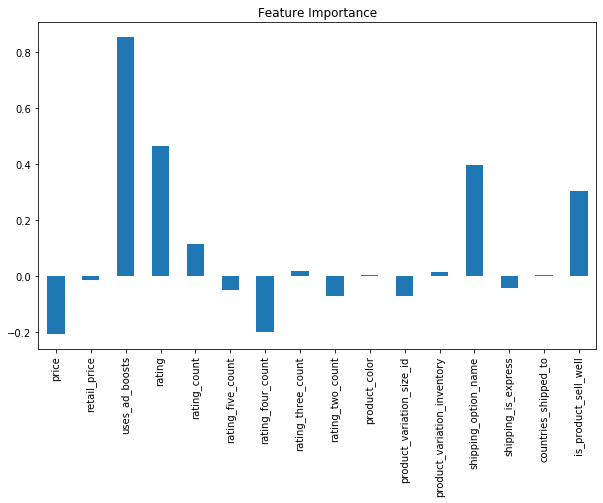

In [98]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(10,6));

If you compare feature importance before we delete some column and after we delete it. There are some several column who changed in feature importance

# Finish

After some EDA and model analyze, we achieve a result what we want

We want 90% accuracy of data and then we get 95% accuracy

Yeah, it's too long process, and we can still do EDA or tuning the model to get a better result. But i think i need stop in this section and try to do same thing with different dataset